# Exploratory Data Analysis on HR Analytics Data

# Identify the best source of recruitment for a tech startup, based on previous data of candidate sources and recruitment strategies 


In [ ]:
# EDA for HR Analytics Data

In [ ]:
# Steps for Analysing the HR Analytics Data

.Problem statement understanding

.Data understanding

.Data preparation

In [ ]:
1-Importing libraries
2-Importing the Dataset into Pandas Dataframe
3-Data Cleaning, Missing Data Handling, performing Analysis like Univariate and Bivariate and Multivariate on HR Analytics.

Importing Necessery libraries

In [27]:
#Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_line

import warnings
warnings.filterwarnings(action="ignore")

plt.style.use('seaborn-poster')
plt.style.use('fivethirtyeight')

In [11]:
#Read data from CSV to a data frame
#Read the dataset and check the first Ten rows
import pandas as pd
hr_df=pd.read_csv("Recruitment_Data.csv")
hr_df.head(10)

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online
5,1,3,0.548123,Referral
6,1,3,0.794213,Applied Online
7,0,2,1.006524,Referral
8,0,3,1.519917,Campus
9,0,3,2.073528,NaN


In [12]:
hr_df

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online
...,...,...,...,...
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,NaN
444,0,4,1.598213,Applied Online


In [13]:
# checking the shape of the dataset
hr_df.shape # There are total 446 rows and 4 columns are there in HR Analytics dataset

(446, 4)

In [14]:
# checking the data types of a data set
hr_df.dtypes

attrition               int64
performance_rating      int64
sales_quota_pct       float64
recruiting_source      object
dtype: object

In [15]:
# separating the workers into two dataframes according to Attrition and compare their averages

import pandas as pd
hr_df=pd.read_csv("Recruitment_Data.csv")
attrition_yes = hr_df.loc[hr_df["attrition"] == 1]
attrition_no = hr_df.loc[hr_df["attrition"] == 0]


In [16]:
# I use concat to join the two DF, rename the columns and then give it some color :)
hr_df_mean_attrition = pd.concat((attrition_yes.mean(),attrition_no.mean()),axis=1)
hr_df_mean_attrition.columns = ["Yes","No"]
hr_df_mean_attrition.round(2).style.background_gradient(cmap="tab20_r",axis=1)


,Yes,No
attrition,1.000000,0.000000
performance_rating,2.860000,2.900000
sales_quota_pct,1.020000,1.100000


# Identify groups in the dataset


In [17]:
Recruitment=hr_df.groupby("attrition")["recruiting_source"].count()
print(Recruitment)

attrition
0    173
1     68
Name: recruiting_source, dtype: int64


In [18]:
# After identifying the groups in the dataset there are having highest no.of employees who are surviving in their company.Lowest 
# no.of employees who are resigned or left in their company.

In [19]:
hr_df.groupby(['recruiting_source'])

In [20]:
hr_df = pd.DataFrame(hr_df)

print(hr_df.groupby(["recruiting_source"]).sum())


                   attrition  performance_rating  sales_quota_pct
recruiting_source                                                
Applied Online            32                 381       137.616724
Campus                    16                 164        50.849983
Referral                  15                 128        46.043918
Search Firm                5                  27         8.869603


In [21]:
grouped_df = hr_df.groupby('recruiting_source').mean()


In [22]:
print(grouped_df)

                   attrition  performance_rating  sales_quota_pct
recruiting_source                                                
Applied Online      0.246154            2.930769         1.058590
Campus              0.285714            2.928571         0.908035
Referral            0.333333            2.844444         1.023198
Search Firm         0.500000            2.700000         0.886960


In [23]:
# It returns total number of elements in dataset
hr_df.size

1784

# Checking Average Sales Numbers and Attrition Numbers


In [24]:
cross_tab = pd.crosstab(hr_df['recruiting_source'], hr_df['attrition'])

In [25]:
print(cross_tab)

attrition           0   1
recruiting_source        
Applied Online     98  32
Campus             40  16
Referral           30  15
Search Firm         5   5


Printing out the average Sales Number grouped by Recruiting Source

In [26]:
# Group the data by Recruiting Source and compute the average Sales Number for each group
avg_sales_by_source = hr_df.groupby('recruiting_source')['sales_quota_pct'].mean()

# Print the results
print(avg_sales_by_source)


recruiting_source
Applied Online    1.058590
Campus            0.908035
Referral          1.023198
Search Firm       0.886960
Name: sales_quota_pct, dtype: float64


Printing out the average Attrition Number grouped by Recruiting Source


In [27]:
# Group the data by Recruiting Source and compute the average Attrition Number for each group
avg_attrition_by_source = hr_df.groupby('recruiting_source')['attrition'].mean()

# Print the results
print(avg_attrition_by_source)

recruiting_source
Applied Online    0.246154
Campus            0.285714
Referral          0.333333
Search Firm       0.500000
Name: attrition, dtype: float64


In [28]:
# Here that sources that have high Sales numbers and low Attrition numbers.

In [29]:
# Group data by Recruiting Source
grouped = hr_df.groupby('recruiting_source')

# Count the number of occurrences for each group
counts = grouped.size()

# Print the results
print(counts)

recruiting_source
Applied Online    130
Campus             56
Referral           45
Search Firm        10
dtype: int64


In [30]:
# Grouping by total columns

In [31]:
hr_df.groupby(['attrition','performance_rating','sales_quota_pct','recruiting_source']).count()

Empty DataFrame
Columns: []
Index: [(0, 1, 1.976906211, Applied Online), (0, 2, -0.474431203, Campus), (0, 2, -0.239220234, Campus), (0, 2, 0.004189019, Applied Online), (0, 2, 0.317765084, Referral), (0, 2, 0.421217115, Referral), (0, 2, 0.554076497, Applied Online), (0, 2, 0.620710627, Applied Online), (0, 2, 0.632941547, Applied Online), (0, 2, 0.678046205, Search Firm), (0, 2, 0.73178933, Referral), (0, 2, 0.778561531, Campus), (0, 2, 0.816487675, Applied Online), (0, 2, 0.903977583, Campus), (0, 2, 0.910585327, Applied Online), (0, 2, 0.936424442, Applied Online), (0, 2, 0.937444501, Applied Online), (0, 2, 0.942639118, Applied Online), (0, 2, 1.001371648, Referral), (0, 2, 1.006524423, Referral), (0, 2, 1.081976577, Campus), (0, 2, 1.10837549, Applied Online), (0, 2, 1.183785733, Applied Online), (0, 2, 1.305396927, Applied Online), (0, 2, 1.327002902, Referral), (0, 2, 1.367603566, Campus), (0, 2, 1.395772056, Referral), (0, 2, 1.42611085, Applied Online), (0, 2, 1.436987733, Campus), (0, 2, 1.470579429, Applied Online), (0, 2, 1.596278903, Applied Online), (0, 2, 1.645100618, Applied Online), (0, 2, 1.753637434, Applied Online), (0, 2, 1.760735094, Applied Online), (0, 2, 1.823216145, Applied Online), (0, 2, 1.840430662, Applied Online), (0, 2, 1.870081964, Referral), (0, 2, 1.942499255, Applied Online), (0, 2, 2.142970179, Campus), (0, 2, 2.176899621, Applied Online), (0, 2, 3.666739696, Referral), (0, 3, -0.627667242, Applied Online), (0, 3, -0.556073302, Campus), (0, 3, -0.191553685, Applied Online), (0, 3, -0.064948041, Search Firm), (0, 3, -0.061589749, Campus), (0, 3, 0.073589697, Applied Online), (0, 3, 0.084894907, Applied Online), (0, 3, 0.106998799, Applied Online), (0, 3, 0.108202056, Applied Online), (0, 3, 0.154740784, Referral), (0, 3, 0.189004418, Search Firm), (0, 3, 0.225125632, Campus), (0, 3, 0.248797122, Applied Online), (0, 3, 0.281994798, Referral), (0, 3, 0.304051687, Applied Online), (0, 3, 0.307372253, Applied Online), (0, 3, 0.31310585, Campus), (0, 3, 0.362379477, Applied Online), (0, 3, 0.366818274, Campus), (0, 3, 0.398907674, Campus), (0, 3, 0.411784209, Campus), (0, 3, 0.416650251, Applied Online), (0, 3, 0.421961082, Referral), (0, 3, 0.493475938, Campus), (0, 3, 0.502660186, Campus), (0, 3, 0.506631772, Applied Online), (0, 3, 0.50825871, Applied Online), (0, 3, 0.533871577, Campus), (0, 3, 0.542305963, Applied Online), (0, 3, 0.54659813, Applied Online), (0, 3, 0.558393493, Campus), (0, 3, 0.567705932, Campus), (0, 3, 0.580933906, Applied Online), (0, 3, 0.618811781, Campus), (0, 3, 0.664018071, Applied Online), (0, 3, 0.681826178, Referral), (0, 3, 0.690769357, Applied Online), (0, 3, 0.700070507, Applied Online), (0, 3, 0.717144277, Applied Online), (0, 3, 0.732530182, Applied Online), (0, 3, 0.78037289, Referral), (0, 3, 0.793227355, Referral), (0, 3, 0.806493232, Applied Online), (0, 3, 0.816504373, Applied Online), (0, 3, 0.825790823, Referral), (0, 3, 0.856272111, Applied Online), (0, 3, 0.862524227, Applied Online), (0, 3, 0.939095326, Referral), (0, 3, 0.957395105, Applied Online), (0, 3, 0.962445715, Applied Online), (0, 3, 0.979641159, Campus), (0, 3, 0.988873487, Referral), (0, 3, 0.990032764, Applied Online), (0, 3, 1.003446279, Applied Online), (0, 3, 1.018546915, Applied Online), (0, 3, 1.023242508, Referral), (0, 3, 1.052279905, Applied Online), (0, 3, 1.073352538, Applied Online), (0, 3, 1.09519894, Referral), ...]

[241 rows x 0 columns]

In [32]:
# The describe() method returns description of the data in the dataframe.
hr_df.describe()

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


# Data Handling and Cleaning

In [33]:
# printing all the columns in total dataset
print(hr_df.columns)

Index(['attrition', 'performance_rating', 'sales_quota_pct',
       'recruiting_source'],
      dtype='object')


In [34]:
# Check the datatypes of all the columns of the dataframe
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [35]:
hr_df.dtypes

attrition               int64
performance_rating      int64
sales_quota_pct       float64
recruiting_source      object
dtype: object

# Missing Value Treatment

In [36]:
#In Data cleaning the first step is to check the missing values
#Check the number of null(missing) values in the columns
# Missing value means that values is not present in the data

In [37]:
#Check the number of null(missing) values in the columns
hr_df.isnull()
# .isnull() function checking that if missing value is present in data means it returns true
# otherwise it returns false
# And also True means '1'
# And false means 0

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,False,False,False,False
1,False,False,False,True
2,False,False,False,False
3,False,False,False,True
4,False,False,False,False
...,...,...,...,...
441,False,False,False,False
442,False,False,False,False
443,False,False,False,True
444,False,False,False,False


In [38]:
# checking the null values in HR Analytics
hr_df_null = hr_df.isnull().sum()
hr_df_null
# adding the false values(0) and true values (1)
# Here as we can see that recruiting_source column contains more missing values


attrition               0
performance_rating      0
sales_quota_pct         0
recruiting_source     205
dtype: int64

In [39]:
# calculating the null values percentage in HR Analytics
# Another method to check the missing values is to
#Check the percentage of null(missing) values in the columns
hr_df.isnull().sum()/len(hr_df)*100
#percentage method is better to check the missing values than .sum() method.


attrition              0.000000
performance_rating     0.000000
sales_quota_pct        0.000000
recruiting_source     45.964126
dtype: float64

In [40]:
# Here as we can see that recruiting_source column contains more missing values than other columns

In [41]:
# Here there are 4 columns are there in HR Analytics
print(len(hr_df.columns))

4


In [42]:
# checking the total null values in total dataset
hr_df.isnull().sum().sum()

205

In [43]:
#Listing out  the missing value column names 
req_col = []
for i in hr_df.columns:
    if hr_df[i].isnull().sum()>0:
         req_col.append(i)
print(req_col)    

['recruiting_source']


In [44]:
# Total missing value columns in number
len(req_col)

1

In [45]:
# checking the unique columns that are present in the 'recruiting_source'column.
hr_df["recruiting_source"].unique()


array(['Applied Online', nan, 'Campus', 'Referral', 'Search Firm'],
      dtype=object)

In [143]:
# filling the null values with 'other_source'
hr_df['recruiting_source']=hr_df['recruiting_source'].fillna('other_source')

In [144]:
hr_df.groupby('recruiting_source')['attrition'].mean()

recruiting_source
Applied Online    0.246154
Campus            0.285714
Referral          0.333333
Search Firm       0.500000
other_source      0.131707
Name: attrition, dtype: float64

In [145]:
#Check the nulls in the recruiting_source column again to cross-verify
hr_df["recruiting_source"].isnull().sum()

0

In [146]:
#Check the nulls in the entire dataframe again
hr_df.isnull().sum()
# Here the recruiting_source is not having a missing values because we filled the missing values with 'other_source'.


attrition             0
performance_rating    0
sales_quota_pct       0
recruiting_source     0
dtype: int64

In [147]:
# Now there is no missing values in the HR Analytics dataframe

In [148]:
# checking the data types of HR Analytics data frame.
hr_df.dtypes

attrition               int64
performance_rating      int64
sales_quota_pct       float64
recruiting_source      object
dtype: object

In [149]:
# By checking the data types there is having a correct data types in HR Analytics dataset

In [150]:
# After Missing value Treatment again checking the null values of total data set.
hr_df.isnull()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
441,False,False,False,False
442,False,False,False,False
443,False,False,False,False
444,False,False,False,False


In [89]:
# As we can see there is no missing values in the given dataset

# Analysis

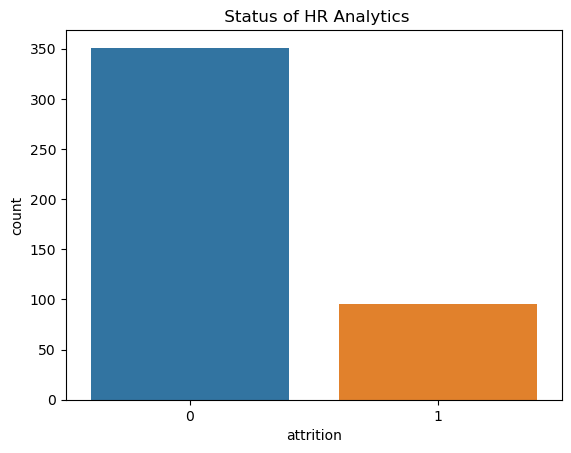

In [90]:
# checking the  status of HR Analytics
import matplotlib.pyplot as plt
import seaborn as sns

hr_df=pd.read_csv("Recruitment_Data.csv")
plt.title(" Status of HR Analytics")
sns.countplot(hr_df['attrition'])
plt.show()

import warnings
warnings.filterwarnings(action="ignore")

In [91]:
# comments:
# The status of HR Analytics gives us that there are highest no.of employees who are surviving in their company and lowest no.of employees
# who are resigned or left their job in their company.

# Univariate Analysis

Performing Frequency distribuion for 'attrition' column

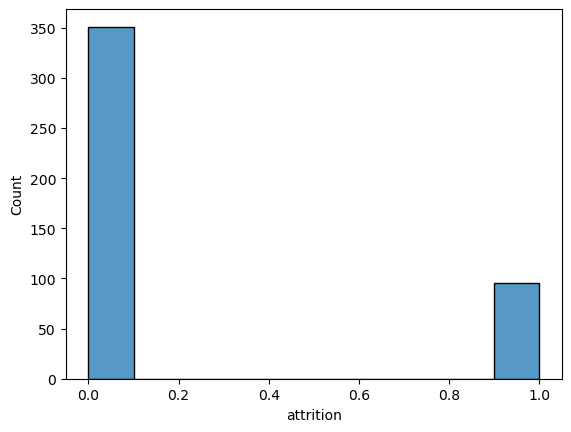

In [131]:
# performing Frequency distribuion for 'attrition'column
sns.histplot(hr_df["attrition"])
plt.show()

In [132]:
# comments:
#     The attrition contains high 'o' and low '1' values in HR Analytics dataframe
# By this we can get that there are highest number of employees who are surviving in their company i.e'0' and lowest number of employees who are 
# resigned their job in their company.

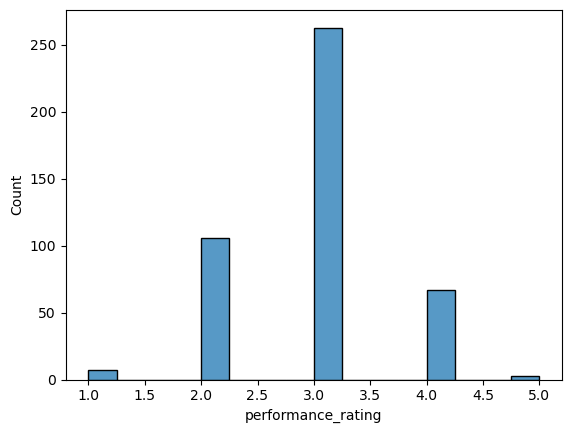

In [133]:
# Frequency distribution plot for "performance_rating" column
sns.histplot(hr_df["performance_rating"])
plt.show()

In [134]:
#comments:
# In "performance_rating" column the more no.of employees having performance rating '3' and less no.of employees having performance rating '5' in HR Analytics data.


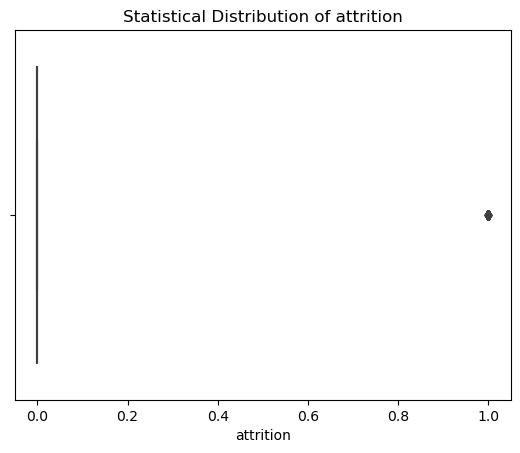

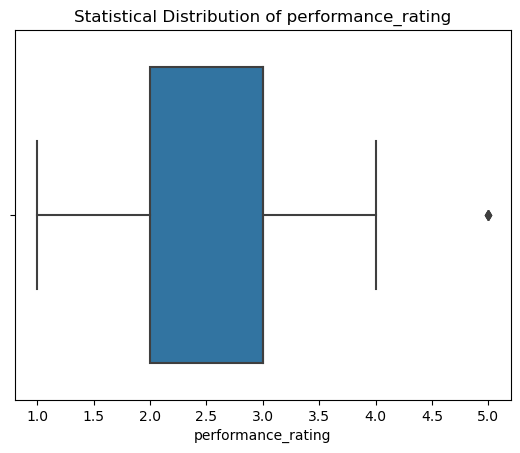

In [135]:
# performing the statistical distribution for 'attrition'column and 'performance_rating'column to find the outliers present in 
# the dataframe.
cont_cols=["attrition","performance_rating"]
for  i in cont_cols:
    sns.boxplot(hr_df[i])
    plt.title("Statistical Distribution of "+i)
    plt.show()
import warnings
warnings.filterwarnings(action="ignore")    

In [136]:
# comments:
# By this statistical distribution of both columns we get to know that
# The outliers are present in the HR Analytics data frame.
# The outliers for 'attrition'column is resigned employees in their company.
# The outliers for 'performance_rating' column is having less employees with rating '5'

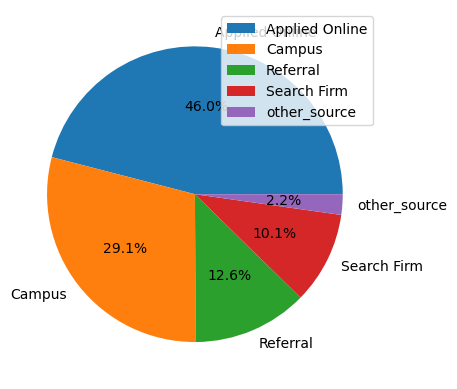

In [152]:
# pie-chart for categorical column i.e "recruiting_source"
recruiting_column=hr_df["recruiting_source"].value_counts(normalize=True).values
lab=["Applied Online","Campus","Referral","Search Firm","other_source"]
plt.pie(recruiting_column,labels=lab,autopct='%0.1f%%')
plt.legend() 
plt.show()

In [153]:
# comments:
# By this pie-chart we get to know that there are highest no.of employees who are Applied online and lowest number of employees who are 
# taken Search Firm source.

# Bivariate Analysis

In [154]:
# It is used to see the relationship between two continuous varible
# The Relation between 'attrition' column and 'performance_rating' column.

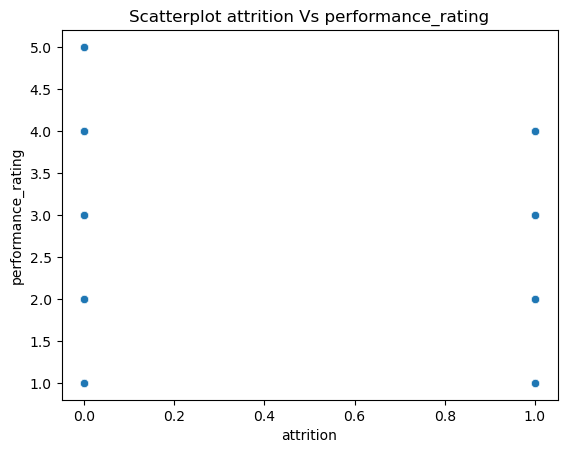

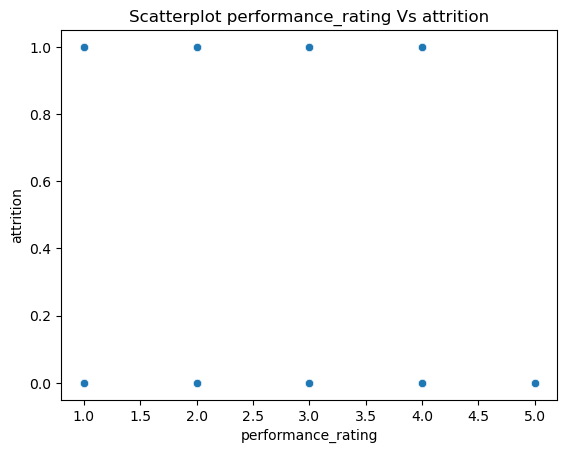

In [155]:
for i in cont_cols:
    for j in cont_cols:
        if i!=j:
            sns.scatterplot(hr_df[i],hr_df[j])
            plt.title("Scatterplot "+i+" Vs "+j)
            plt.show()

In [156]:
# comments:
# There is no correlation relation between 'performance_rating'column and 'attrition' column.

Which hires had lower attrition rate?

Another quality of hire metric you can consider is the attrition rate, or how often hires leave the company.

The Average comparision between 'recruiting_source' column and 'attrition'column

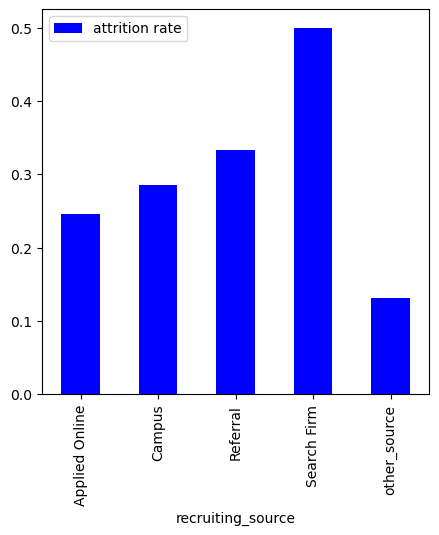

In [157]:
hr_df.groupby('recruiting_source')['attrition'].mean().plot(kind='bar',figsize=(5,5),cmap="bwr")
plt.legend(['attrition rate'],loc="upper left")
plt.ylabel='attrition rate (%)'
plt.xticks(rotation="vertical")
plt.show()

In [158]:
# comments:
# The comparision between 'attrition' column and 'recruiting_source'column.
# The only search Firm source having highest 'attrition' rate when compared to other sources.while lowest for hires coming from "Applied Online".

Which recruiting source resulted highest sales quota retainment?

Sales quota attainment is how much a salesperson sold last year relative to their quota. An employee whose sales_quota_pct equals .75 sold 75% of their quota, for example. This metric can be helpful because raw sales numbers are not always comparable between employees.



The Average comparision between 'recruiting_source' and 'sales_quota_pct' column

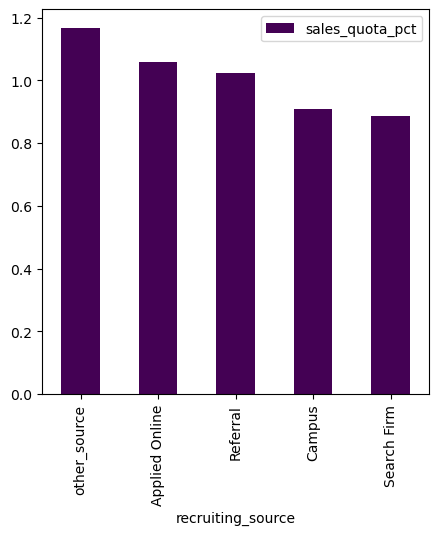

In [159]:
# Which recruiting source resulted highest sales_quota_pct?
hr_df.groupby('recruiting_source')['sales_quota_pct'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(5,5),cmap="viridis")
plt.legend(['sales_quota_pct'],loc="upper right")
plt.ylabel='sales_quota_pct (%)'
plt.xticks(rotation="vertical")
plt.show()

In [160]:
# comments:
# The comparision between 'recruiting_source' and 'sales_quota_pct'.
# # The 'Applied online' having highest rate in sales_quota_pct when compared to others sources in recruiting_source.

The Average comparision between 'recruiting_source' column and 'performance_rating' column

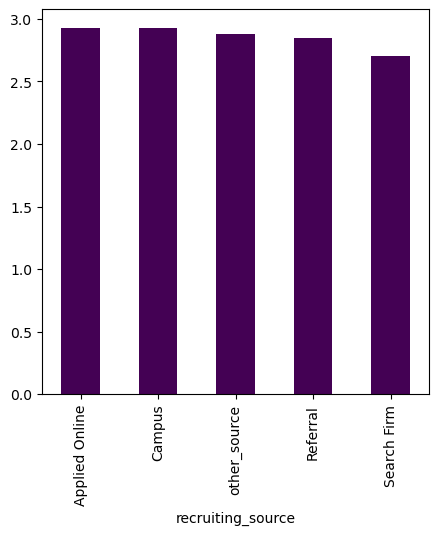

In [161]:
hr_df.groupby('recruiting_source')['performance_rating'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(5,5),cmap="viridis")
# plt.legend(['Perfromance rating'],loc="upper right")
plt.ylabel='Perfromance rating'
plt.xticks(rotation="vertical")
plt.show()

In [162]:
# comments:
# The comparsion between 'recruiting_source' and 'performance_rating'.
# This shows that the performance rating of the employees who were hired via "Applied Online" channel is higher than the rest. However the differences are small and 
# a statistical test is required to study the significance of the differences.
# The Employees who are taken these sources having  performance rating nearly equal to '3'.

# Visualization with plotnine

Visualizing Attrition differences by Recruiting Source

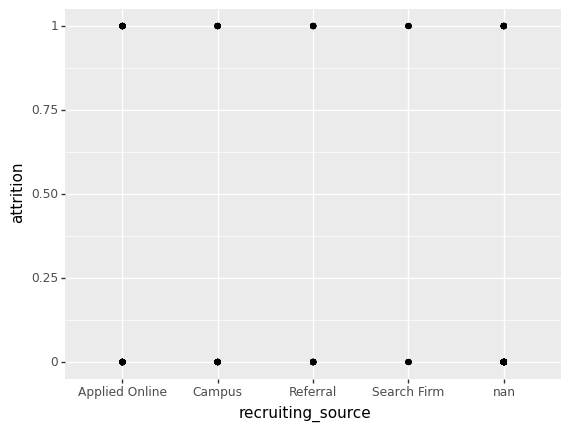

<ggplot: (144359388001)>

In [163]:
import pandas as pd
hr_df=pd.read_csv("Recruitment_Data.csv")

from plotnine import ggplot, aes, geom_point

(
    ggplot(hr_df)
    + aes(x="recruiting_source", y="attrition")
    + geom_point()
)

Visualizing Sales differences by Recruiting Source

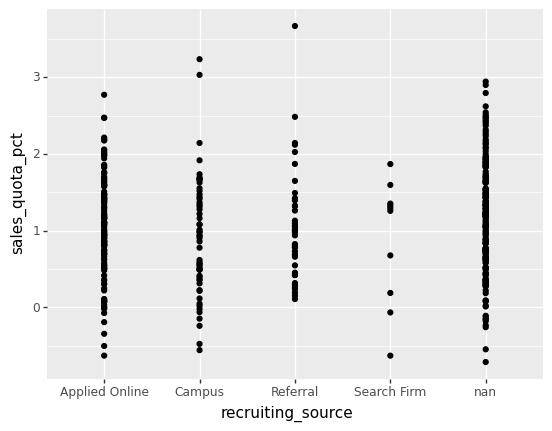

<ggplot: (144360824061)>

In [164]:
from plotnine import ggplot, aes, geom_point

(
    ggplot(hr_df)
    + aes(x="recruiting_source", y="sales_quota_pct")
    + geom_point()
)

# Multivariate Analysis

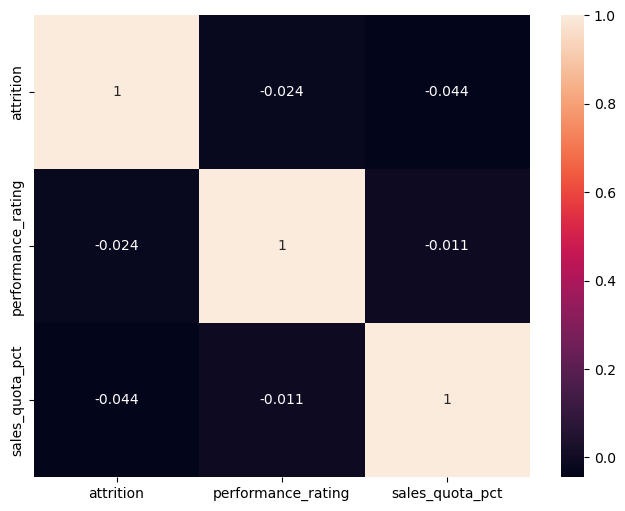

In [165]:
plt.figure(figsize=(8,6)) 
sns.heatmap(hr_df.corr(),annot=True)
plt.show()

In [90]:
# comments:
# The heatmap is between of 'attrition' and 'performance_rating' and 'sales_quota_pct'columns.

# Checking Average Sales Numbers and Attrition Numbers


In [91]:
# After analyzing the data and  the missing value treatment ,checking the average between sales numbers and attrition numbers.

Printing out the average Sales Number grouped by Recruiting Source

In [92]:
# Group the data by Recruiting Source and compute the average Sales Number for each group
avg_sales_by_source = hr_df.groupby('recruiting_source')['sales_quota_pct'].mean()

# Print the results
print(avg_sales_by_source)


recruiting_source
Applied Online    1.058590
Campus            0.908035
Referral          1.023198
Search Firm       0.886960
other_source      1.168109
Name: sales_quota_pct, dtype: float64


Printing out the average Attrition Number grouped by Recruiting Source



In [93]:
avg_sales_by_source = hr_df.groupby('recruiting_source')['attrition'].mean()

# Print the results
print(avg_sales_by_source)


recruiting_source
Applied Online    0.246154
Campus            0.285714
Referral          0.333333
Search Firm       0.500000
other_source      0.131707
Name: attrition, dtype: float64


In [94]:
# comments:
# Here the sources that have high Sales numbers and low Attrition numbers.


# Identify groups in the dataset

In [95]:
# After analyzing the data and missing value treatment checking the groups in the dataset amoung four columns.

In [96]:
hr_df = pd.DataFrame(hr_df)

print(hr_df.groupby(["recruiting_source"]).sum())


                   attrition  performance_rating  sales_quota_pct
recruiting_source                                                
Applied Online            32                 381       137.616724
Campus                    16                 164        50.849983
Referral                  15                 128        46.043918
Search Firm                5                  27         8.869603
other_source              27                 591       239.462374


In [97]:
grouped_df = hr_df.groupby('recruiting_source').mean()

In [98]:
print(grouped_df)

                   attrition  performance_rating  sales_quota_pct
recruiting_source                                                
Applied Online      0.246154            2.930769         1.058590
Campus              0.285714            2.928571         0.908035
Referral            0.333333            2.844444         1.023198
Search Firm         0.500000            2.700000         0.886960
other_source        0.131707            2.882927         1.168109


In [99]:
# comments:
# After identifying the groups in the dataset we get to know that here increased the percentage of Applied online source.

In [100]:
# Sales Numbers indicate the performance of employees recruited from a source.

# Insights of HR Analyitcs data:

# Attrition Info:

In [ ]:
# The attrition contains highest 'o' and lowest '1' values in HR Analytics dataframe
# By this we get to know that there are highest number of employees who are surviving in their company i.e'0' and lowest number of employees who are 
# resigned their job in their company.
# By Analyzing the data:
# The only search Firm source having highest 'attrition' rate when compared to other sources.while lowest for hires coming from "Applied online"

# Performantion_rating Info:

In [ ]:
# In "performance_rating" column the more workers who are having with highest rating '3' and less employees having  rating '5' in HR Analytics data.
# This shows that the performance rating of the employees who were hired via "Applied Online" channel is higher than the rest. However the differences are small and 
# a statistical test is required to study the significance of the differences.

# Sales_quota_pct Info:

In [ ]:
# The comparision between 'recruiting_source' and 'sales_quota_pct'.
#  The 'Applied online' having highest rate in sales_quota_pct when compared to others sources in recruiting_source.

# recruiting_source Info:
    

In [ ]:
# By this recruiting_source column we get to know that there are highest no.of employees who are taken "Applied online" source and lowest number of employees who are taken
# a Search Firm source.

# Summary:

1.The data is very small

2.The data is less imbalanced

3.The HR Analytics data is having only 4 columns and 446 rows

4.The attrition column is a continous column and having only 0 and 1 values i.e '0' is about employees who are surviving in 
  their company and '1' is who resigned or left their job in their company.

5.The performance rating column is a continous column and having rating like 1,2,3,4,5.The highest no.of employees who got '3'rating
 in their performance in job and lowest no.of employees who got '5' in their performance in job.

6.The sales column is a float data type column and Sales quota attainment is how much a salesperson sold last year relative to their quota. An employee whose sales_quota_pct equals .75 sold 75% of their quota.

7.Sales Numbers indicate the performance of employees recruited from a source.

8.The recruiting_source column is a categorical column having sources like 'Applied online','campus','Referral','Search Firm'.

9.After Data Handling and Missing value Treatment, Performed Analysis

10. Univariate Analysis on 'attrition' column and 'perfromance_rating' column and performed Analysis like pie-chart on recruiting_source column.
    Bivariate Analysis between 'attrition' column and performance_rating column and sales_quota_pct
    Multivariate Analysis - Heatmap

11.The employees in job who are came through 'Applied online' source having a less Attrition Number and high Sales Number when compared to other sources.

12.Identified groups in the dataset.

    

13.By checking Average Sales Numbers and Attrition Numbers:
     The Sources that have high Sales numbers and low Attrition numbers.

    

# Conclusion:

Which of the recruiting sources in this dataset produced the best hires, measured by attrition and sales? Which source produced the worst hires?

Best source in HR Analytics: Applied Online,   Worst source in HR Analytics: Search Firm

